# Bobun-R-Pho
A neural network classifier using Tensorflow and Keras to tell the difference between a Bobun or a Pho.

##Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.callbacks import TensorBoard
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

##Setting the dataset path and labels

In [ ]:
DATADIR = r"C:\Users\Quentin\Pictures\Dataset"
CATEGORIES=["Bobun", "Pho"]

##Opening a picture using cv2

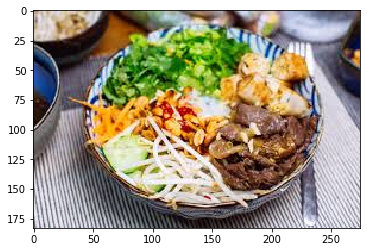

In [ ]:
for category in CATEGORIES : 
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path) :
        img_array = cv2.imread(os.path.join(path,img), -1)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = img_array/255.0
        plt.imshow(img_array)
        plt.show()
        break
    break
        

In [ ]:
print(img_array.shape)

(183, 275, 3)


##Resizing to a 128*128 pixels image

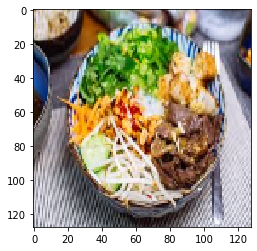

In [ ]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

##Creating the training dataset

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES : 
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path) :
            try : 
                img_array = cv2.imread(os.path.join(path,img), -1)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_array = img_array/255.0
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e :
                pass
            
create_training_data()

In [ ]:
import random

random.shuffle(training_data)

##A simple test to see how the data was shuffled

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
0
0
0
1
0


##Splitting the features and the label in 2 arrays

In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

##Using pickle to save data

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [ ]:
X[1]

array([[[0.97063419, 0.97847733, 0.97455576],
        [0.97254902, 0.98039216, 0.97647059],
        [0.97647059, 0.98431373, 0.98039216],
        ...,
        [0.9254902 , 0.94117647, 0.94509804],
        [0.9254902 , 0.93935355, 0.95056679],
        [0.9254902 , 0.9372549 , 0.95686275]],

       [[0.97063419, 0.97847733, 0.97455576],
        [0.97254902, 0.98039216, 0.97647059],
        [0.97647059, 0.98431373, 0.98039216],
        ...,
        [0.9254902 , 0.94117647, 0.94509804],
        [0.9254902 , 0.93935355, 0.95056679],
        [0.9254902 , 0.9372549 , 0.95686275]],

       [[0.97063419, 0.97847733, 0.97455576],
        [0.97254902, 0.98039216, 0.97647059],
        [0.97647059, 0.98431373, 0.98039216],
        ...,
        [0.9254902 , 0.94117647, 0.94509804],
        [0.9254902 , 0.93935355, 0.95056679],
        [0.9254902 , 0.9372549 , 0.95686275]],

       ...,

       [[0.91764706, 0.93333333, 0.9372549 ],
        [0.91764706, 0.93333333, 0.9372549 ],
        [0.91764706, 0

##Training our NN with differents hyperparameters

In [ ]:
dense_layers = [1, 2, 3, 4, 5]
layer_sizes = [16, 32, 64, 128, 256]
conv_layers = [1, 2, 3, 4, 5]

MAX_ITER = len(dense_layers)*len(layer_sizes)*len(conv_layers)
NUM_ITER = 0

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers :
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            NUM_ITER = NUM_ITER+1
            print(NAME)
            print("{} out of {}".format(NUM_ITER, MAX_ITER))
            tensorboard = TensorBoard(log_dir='logs\Bobun_Pho_{}'.format(NAME))

            model = Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):

                model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss="binary_crossentropy", optimizer ="adam", metrics=['accuracy'])
            
            model.fit(X, y, batch_size=16, epochs = 20, validation_split=0.1, callbacks=[tensorboard])

##Using Tensorboard to identify the best parameters

In [ ]:
%load_ext tensorboard
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}  --host localhost --port 8080

#http://localhost:8088/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 8500.

Best run hyperparameters : 4 Convolutional Layers, 16 Nodes and 1 Dense Layer

##Running the training on best model with high epoch to identify overfitting

In [ ]:
NAME = "Best-Run-4-conv-16-nodes-1-dense-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs\Bobun_Pho_{}'.format(NAME))

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

for l in range(3):

    model.add(Conv2D(16, (3,3), input_shape = X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

for l in range(1):
    model.add(Dense(16))
    model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer ="adam", metrics=['accuracy'])

model.fit(X, y, batch_size=16, epochs = 100, validation_split=0.1, callbacks=[tensorboard])

Best Val_Loss for 12 epochs

In [ ]:
NAME = "Best-Run-12-epochs-4-conv-16-nodes-1-dense-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs\Bobun_Pho_{}'.format(NAME))

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

for l in range(3):

    model.add(Conv2D(16, (3,3), input_shape = X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

for l in range(1):
    model.add(Dense(16))
    model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer ="adam", metrics=['accuracy'])

model.fit(X, y, batch_size=16, epochs = 12, validation_split=0.1, callbacks=[tensorboard])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 471 samples, validate on 53 samples
Epoch 1/12
471/471 [==============================] - 2s 5ms/sample - loss: 0.6886 - acc: 0.5690 - val_loss: 0.6893 - val_acc: 0.5283
Epoch 2/12
471/471 [==============================] - 2s 4ms/sample - loss: 0.6747 - acc: 0.5690 - val_loss: 0.6738 - val_acc: 0.5283
Epoch 3/12
471/471 [==============================] - 2s 4ms/sample - loss: 0.6527 - acc: 0.5966 - val_loss: 0.6210 - val_acc: 0.6415
Epoch 4/12
471/471 [==============================] - 2s 4ms/sample - loss: 0.6054 - acc: 0.7113 - val_loss: 0.5808 - val_acc: 0.6792
Epoch 5/12
471/471 [==============================] - 2s 5ms/sample - loss: 0.5752 - acc: 0.7070 - val_loss: 0.5500 - val_acc: 0.6981
Epoch 6/12
471/471 [==============================] - 2s 4ms/sample - loss: 0.5291 - acc: 0.7537 - val_loss: 0

In [ ]:
tf.keras.models.save_model(
    model, "./bobun_pho_bestmodel/bestrun.model")

In [ ]:
bestmodel = tf.keras.models.load_model("./bobun_pho_bestmodel/bestrun.model")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


##Testing the best model

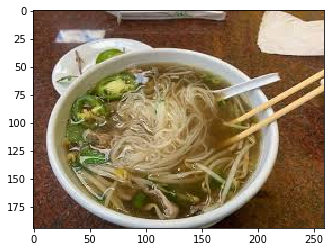

Je suis sûr à 86% que c'est un Pho.


In [ ]:
def prepare(filepath):
    IMG_SIZE = 128
    img_array = cv2.imread(filepath, -1)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return(img_array, new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3))

def show_and_predict(preparation):
    image, image_pred = preparation
    prediction = model.predict(image_pred)
    pred_index = 0
    
    plt.imshow(image)
    plt.show()
    
    if prediction[0][0] > 0.5 :
        pred_index = 1
        pourcentage = int(prediction[0][0]*100)
    else :
        pred_index = 0
        pourcentage = int((1-prediction[0][0])*100)
    
    
    print("Je suis sûr à {}% que c'est un {}.".format(pourcentage, CATEGORIES[pred_index]))
    
show_and_predict(prepare(r"C:\Users\Quentin\Pictures\Dataset\Prediction_Bobun_Pho\005.jpeg"))